In [58]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import tqdm
import nltk
from nltk.corpus import stopwords
import string
from string import punctuation
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
rdf=pd.read_csv("Reddit_Janta.csv")
tdf=pd.read_csv("Twitter_Janta.csv")


In [46]:
replace_values = {
'label': {-1:0, 0:1,1:2} 
}

dtdf["label"] = dtdf["category"]
dtdf= dtdf.replace(replace_values) #1-Positve,0-Negative
dtdf["label"]=pd.to_numeric(dtdf["label"])





In [47]:
dtdf

,clean_text,category,wordtok2,proc,label
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-1.0,when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,modi promise minimum government maximum governance expect begin difficult job reform state take year get justice state business exit psus temple,0.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0,talk all the nonsense and continue all the drama will vote for modi,talk nonsense continue drama vote modi,1.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,say vote modi welcome bjp tell rahul main campaigner modi think modi relax,2.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,1.0,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,ask supporter prefix chowkidar name modi great service confusion read crustal clear crass filthy nonsensical see abuse come chowkidars,2.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0,answer who among these the most powerful world leader today trump putin modi may,answer among powerful world leader today trump putin modi may,2.0
...,...,...,...,...,...
162975,why these 456 crores paid neerav modi not recovered from congress leaders this hard earned money tax payers,-1.0,why these 456 crores paid neerav modi not recovered from congress leaders this hard earned money tax payers,456 crore pay neerav modi recover congress leader hard earn money tax payer,0.0
162976,dear rss terrorist payal gawar what about modi killing 1000 plus muslims listen dysfunctional little pest take your pea size brain bleat somewhere else anyone who commits crime criminal irrespective hindumuslim stop giving criminals religious twist,-1.0,dear rss terrorist payal gawar what about modi killing 1000 plus muslims listen dysfunctional little pest take your pea size brain bleat somewhere else anyone who commits crime criminal irrespective hindumuslim stop giving criminals religious twist,dear rss terrorist payal gawar modi kill 1000 plus muslim listen dysfunctional little pest take pea size brain bleat somewhere else anyone commits crime criminal irrespective hindumuslim stop give criminal religious twist,0.0
162977,did you cover her interaction forum where she left,0.0,did you cover her interaction forum where she left,cover interaction forum leave,1.0
162978,there big project came into india modi dream project but not happened reality,0.0,there big project came into india modi dream project but not happened reality,big project come india modi dream project happen reality,1.0


In [3]:
pd.set_option('display.max_colwidth', None)
tdf=tdf.dropna()
tdf.head(40)

,clean_text,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-1.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,1.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace for narendra modi become again\n,0.0
7,this comes from cabinet which has scholars like modi smriti and hema time introspect,0.0
8,with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho,1.0
9,gandhi was gay does modi,1.0


<h4>
Preprocess the Text
</h4>

Lower,Stopwords,Punctuations,Spaces,Digits

Lower


In [4]:
try:
    tdf["clean_text"]=[x.lower() for x in tdf["clean_text"]]
except:
    pass

Punctuations and WhiteSpaces?

In [5]:

def listpunk(list1):
    if type(list1)==list:
        for x in range(0,(len(list1))):
            list1[x]=re.sub(r'[^\w\s+]', '', list1[x])
            list1[x]=re.sub("\s+",'',list1[x])
        list1 = list(filter(None, list1))

    elif type(list1)==str:
        list1=re.sub(r'[^\w\s+]', '', list1)
        #list1=re.sub("\s+",'',list1)
    
    return list1

tdf["wordtok2"] = tdf['clean_text'].apply(listpunk)

<h4>
Preprocess the Text 2
</h4>

Lemmatization and Stopword

In [6]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def stopword(string):
    a= [i for i in string.split() if i not in stop]
    return ' '.join(a)


def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(string))

%time
tdf['proc'] = tdf['wordtok2'].apply(lambda x: finalpreprocess(x))
tdf.head()



CPU times: total: 0 ns
Wall time: 0 ns


,clean_text,category,wordtok2,proc
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-1.0,when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,modi promise minimum government maximum governance expect begin difficult job reform state take year get justice state business exit psus temple
1,talk all the nonsense and continue all the drama will vote for modi,0.0,talk all the nonsense and continue all the drama will vote for modi,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,say vote modi welcome bjp tell rahul main campaigner modi think modi relax
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,1.0,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,ask supporter prefix chowkidar name modi great service confusion read crustal clear crass filthy nonsensical see abuse come chowkidars
4,answer who among these the most powerful world leader today trump putin modi may,1.0,answer who among these the most powerful world leader today trump putin modi may,answer among powerful world leader today trump putin modi may


In [7]:
btdf=tdf.copy()

In [ ]:
#DO THIS
%time
def ward(x):
    try:
        xx=word_tokenize(x)
    except:
        print(x)
    else:
        return(xx)

def sard(x):
    try:
        xx=sent_tokenize(x)
    except:
        print(x)
    else:
        return(xx)


tdf["wordtok"] = tdf["clean_text"].apply(ward)

#tdf["senttok"] = tdf["clean_text"].apply(sard)

#DO THIS ORRRRRRR

#tdf["wordtok"] = tdf["clean_text"].apply(word_tokenize)
#tdf["senttok"] = tdf["clean_text"].apply(sent_tokenize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: total: 0 ns
Wall time: 0 ns


<h4>
Descriptive Statistics

In [9]:
dtdf=pd.DataFrame()
dtdf["proc"]=tdf["proc"]
dtdf.info

<bound method DataFrame.info of                                                                                                                                                                                                                                  proc
0                                                                                    modi promise minimum government maximum governance expect begin difficult job reform state take year get justice state business exit psus temple
1                                                                                                                                                                                              talk nonsense continue drama vote modi
2                                                                                                                                                          say vote modi welcome bjp tell rahul main campaigner modi think modi relax
3                                               

In [10]:
text =  ' '.join(x for x in tdf["proc"])
print("Words :",len(text))

Words : 15364495


Word Cloud


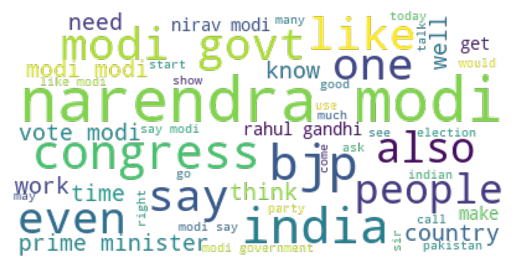

In [11]:
stopwords = set(stop)
wordcloud= WordCloud(mode = 'RGBA', max_font_size=100, stopwords=stopwords, max_words = 50, 
                     background_color= None).generate(text)
plt.imshow(wordcloud, interpolation = 'mitchell')
plt.axis('off')
plt.show()

Word Count


In [12]:
dtdf['wordcount'] = dtdf['proc'].apply(lambda x: len(str(x).split(" ")))
dtdf[['proc','wordcount']].head()


,proc,wordcount
0,modi promise minimum government maximum governance expect begin difficult job reform state take year get justice state business exit psus temple,21
1,talk nonsense continue drama vote modi,6
2,say vote modi welcome bjp tell rahul main campaigner modi think modi relax,13
3,ask supporter prefix chowkidar name modi great service confusion read crustal clear crass filthy nonsensical see abuse come chowkidars,19
4,answer among powerful world leader today trump putin modi may,10


Word Embedding
<h4>
Word Embedding

In [16]:
doc = dtdf["proc"]
doc

0                                                                                      modi promise minimum government maximum governance expect begin difficult job reform state take year get justice state business exit psus temple
1                                                                                                                                                                                                talk nonsense continue drama vote modi
2                                                                                                                                                            say vote modi welcome bjp tell rahul main campaigner modi think modi relax
3                                                                                                ask supporter prefix chowkidar name modi great service confusion read crustal clear crass filthy nonsensical see abuse come chowkidars
4                                                                       

In [48]:
x_train,x_test,y_train, y_test = train_test_split(dtdf['proc'], dtdf['label'], test_size=0.26, random_state=30)
print("Train: ",x_train.shape,y_train.shape,"Test: ",(x_test.shape,y_test.shape))

Train:  (120597,) (120597,) Test:  ((42372,), (42372,))


In [50]:
# Word Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
x_train_vectors_tfidf = tfidf_vectorizer.fit_transform(x_train) 
x_test_vectors_tfidf = tfidf_vectorizer.transform(x_test)

In [52]:
x_test_vectors_tfidf

<42372x82382 sparse matrix of type '<class 'numpy.float64'>'
	with 547510 stored elements in Compressed Sparse Row format>

In [ ]:
#Logistic Regression
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')

lr_tfidf.fit(x_train_vectors_tfidf, y_train)  

#Predict y value for test dataset
y_predict = lr_tfidf.predict(x_test_vectors_tfidf)

y_prob = lr_tfidf.predict_proba(x_test_vectors_tfidf)[:,1]

print(classification_report(y_test,y_predict))

print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='2.0')
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)


In [71]:
# Predicting on test data

#converting words to numerical data using tf-idf
X_vector=tfidf_vectorizer.transform(x_test)

#use the best model to predict 'target' value for the new dataset 
y_predict = lr_tfidf.predict(X_vector)      

y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
classification_df=pd.DataFrame()
classification_df = dtdf[['proc','label']].reset_index(drop=True)

y_prob

array([4.06252059e-05, 1.66245035e-05, 6.29299750e-01, ...,
       1.91179679e-01, 3.83770580e-06, 3.76650586e-02])